# TranSysTor IDE 🔷

**Framework TSCP - Environnement de Développement Intégré**

Version: 0.1.0 | License: BSD-3-Clause

---

## Vue d'ensemble

Cet IDE interactif permet de :
- 📊 Visualiser les cubes CM2 (4×4×4) et CM3 (5×5×5)
- 🗂️ Explorer la hiérarchie des modèles (CM0→CM1→CM2→CM3)
- ✅ Valider et critiquer les principes rangés
- 🧮 Vérifier l'orthogonalité mathématique
- 💾 Charger et sauvegarder les modèles JSON

## 1. Configuration et imports

In [1]:
# Imports standard
import json
import numpy as np
from pathlib import Path
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import ipywidgets as widgets
from IPython.display import display, HTML, clear_output

# Configuration
MODEL_DIR = Path('../models/tscp')
SCHEMA_DIR = Path('../models/schemas')

print("✅ Imports réussis")
print(f"📂 Répertoire modèles: {MODEL_DIR.absolute()}")

✅ Imports réussis
📂 Répertoire modèles: E:\_00_Michel\_00_Lab\_00_GitHub\transystor\notebooks\..\models\tscp


## 2. Chargement des modèles

In [2]:
def load_model(layer_name):
    """Charge un modèle JSON depuis le répertoire models/tscp"""
    file_path = MODEL_DIR / f"{layer_name.lower()}.json"
    
    if not file_path.exists():
        print(f"⚠️  Fichier {file_path} non trouvé. Création d'un modèle vide.")
        return {"layer": layer_name, "version": "0.1.0"}
    
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    
    print(f"✅ Modèle {layer_name} chargé")
    return data

# Charger les modèles
cm0_model = load_model('CM0')
cm1_model = load_model('CM1')
cm2_model = load_model('CM2')
cm3_model = load_model('CM3')

print("\n📊 Statistiques:")
print(f"  CM0: {len(cm0_model.get('meta_metaclasses', []))} meta-metaclasses, {len(cm0_model.get('meta_traits', []))} méta-traits")
print(f"  CM1: Modèle chargé (version {cm1_model.get('version', 'N/A')})")
print(f"  CM2: Modèle chargé (version {cm2_model.get('version', 'N/A')})")
print(f"  CM3: Modèle chargé (version {cm3_model.get('version', 'N/A')})")

✅ Modèle CM0 chargé
⚠️  Fichier ..\models\tscp\cm1.json non trouvé. Création d'un modèle vide.
⚠️  Fichier ..\models\tscp\cm2.json non trouvé. Création d'un modèle vide.
⚠️  Fichier ..\models\tscp\cm3.json non trouvé. Création d'un modèle vide.

📊 Statistiques:
  CM0: 3 meta-metaclasses, 3 méta-traits
  CM1: Modèle chargé (version 0.1.0)
  CM2: Modèle chargé (version 0.1.0)
  CM3: Modèle chargé (version 0.1.0)


## 3. Données de démonstration

Principes déjà rangés lors de notre session de travail.

In [3]:
# Principes CM1/CM2 pour visualisation
principles_data = [
    {
        'name': 'Observateur',
        'layer': 'CM1',
        'position': [1, 1, 1],
        'color': '#3b82f6',
        'description': 'Point de départ anthropocentrique, applicable universellement',
        'type': 'MetaClass ∈ CM1'
    },
    {
        'name': 'Interface',
        'layer': 'CM1',
        'position': [2, 1, 2],
        'color': '#10b981',
        'description': 'Médiation entre systèmes, substrat de Relation',
        'type': 'MetaClass ∈ CM1',
        'relations': ['substrat_of: Relation', 'has_property: Échange (CM0)']
    },
    {
        'name': 'Langage',
        'layer': 'CM1',
        'position': [2, 2, 1],
        'color': '#8b5cf6',
        'description': "Interface d'échange avec propriété Échange",
        'type': 'MetaClass ∈ CM1'
    },
    {
        'name': 'Relation',
        'layer': 'CM1',
        'position': [3, 1, 2],
        'color': '#f59e0b',
        'description': 'Principe structurant fondamental',
        'type': 'MetaClass ∈ CM1'
    },
    {
        'name': 'Réseau',
        'layer': 'CM1',
        'position': [3, 2, 3],
        'color': '#ef4444',
        'description': 'Structure organisationnelle',
        'type': 'MetaClass ∈ CM1',
        'relations': ['implies: Agent', 'implies: Rôle', 'implies: Comportement']
    },
    {
        'name': 'Agent',
        'layer': 'CM1',
        'position': [2, 3, 3],
        'color': '#06b6d4',
        'description': 'Entité active avec Rôle',
        'type': 'MetaClass ∈ CM1'
    },
    {
        'name': 'Distribution',
        'layer': 'CM1',
        'position': [1, 2, 3],
        'color': '#ec4899',
        'description': 'Processus de dispersion/acheminement',
        'type': 'MetaClass ∈ CM1',
        'derives': ['Processus ⊂ CM0']
    },
    {
        'name': 'Communication',
        'layer': 'CM1',
        'position': [3, 3, 2],
        'color': '#14b8a6',
        'description': "Processus d'échange informationnel",
        'type': 'MetaClass ∈ CM1',
        'derives': ['Processus ⊂ CM0']
    },
    {
        'name': 'Protocole',
        'layer': 'CM2',
        'position': [2, 1, 1],
        'color': '#a855f7',
        'description': "Instance d'Interface avec règles",
        'type': 'Class ∈ CM2',
        'derives': ['Interface ⊂ CM1']
    },
    {
        'name': 'Bus',
        'layer': 'CM2',
        'position': [1, 3, 3],
        'color': '#f97316',
        'description': 'Combinaison Processus ⊗ Distribution',
        'type': 'Class ∈ CM2',
        'combination': 'Bus = Processus ⊗ Distribution'
    },
]

print(f"📦 {len(principles_data)} principes chargés pour visualisation")

📦 10 principes chargés pour visualisation


## 4. Visualisation 3D du Cube CM2

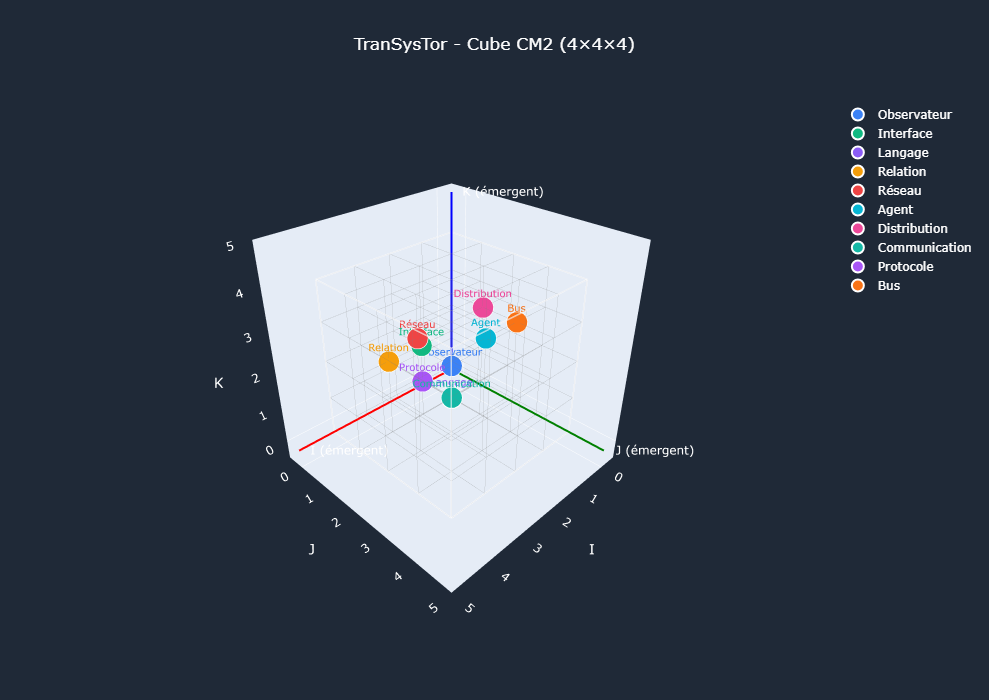

In [4]:
def create_cube_visualization(principles, show_grid=True, show_axes=True):
    """Crée une visualisation 3D interactive du cube CM2"""
    
    fig = go.Figure()
    
    # Grille 3D (lignes du cube 4x4x4)
    if show_grid:
        grid_lines = []
        
        # Lignes parallèles à I
        for j in range(5):
            for k in range(5):
                grid_lines.extend([[0, j, k], [4, j, k], [None, None, None]])
        
        # Lignes parallèles à J
        for i in range(5):
            for k in range(5):
                grid_lines.extend([[i, 0, k], [i, 4, k], [None, None, None]])
        
        # Lignes parallèles à K
        for i in range(5):
            for j in range(5):
                grid_lines.extend([[i, j, 0], [i, j, 4], [None, None, None]])
        
        x_grid, y_grid, z_grid = zip(*grid_lines)
        
        fig.add_trace(go.Scatter3d(
            x=x_grid, y=y_grid, z=z_grid,
            mode='lines',
            line=dict(color='gray', width=1),
            opacity=0.3,
            name='Grille',
            showlegend=False,
            hoverinfo='skip'
        ))
    
    # Arêtes principales du cube
    edges = [
        [[0,0,0], [4,0,0]], [[0,0,0], [0,4,0]], [[0,0,0], [0,0,4]],
        [[4,4,4], [0,4,4]], [[4,4,4], [4,0,4]], [[4,4,4], [4,4,0]],
        [[4,0,0], [4,4,0]], [[4,0,0], [4,0,4]], [[0,4,0], [4,4,0]],
        [[0,4,0], [0,4,4]], [[0,0,4], [4,0,4]], [[0,0,4], [0,4,4]]
    ]
    
    edge_lines = []
    for edge in edges:
        edge_lines.extend([edge[0], edge[1], [None, None, None]])
    
    x_edges, y_edges, z_edges = zip(*edge_lines)
    
    fig.add_trace(go.Scatter3d(
        x=x_edges, y=y_edges, z=z_edges,
        mode='lines',
        line=dict(color='white', width=3),
        opacity=0.6,
        name='Cube',
        showlegend=False,
        hoverinfo='skip'
    ))
    
    # Principes
    for p in principles:
        pos = p['position']
        
        hover_text = f"<b>{p['name']}</b><br>"
        hover_text += f"Couche: {p['layer']}<br>"
        hover_text += f"Position: [{pos[0]}, {pos[1]}, {pos[2]}]<br>"
        hover_text += f"Type: {p['type']}<br>"
        hover_text += f"<br>{p['description']}"
        
        if 'combination' in p:
            hover_text += f"<br><br>Combinaison: {p['combination']}"
        
        fig.add_trace(go.Scatter3d(
            x=[pos[0]], y=[pos[1]], z=[pos[2]],
            mode='markers+text',
            marker=dict(
                size=12,
                color=p['color'],
                line=dict(color='white', width=2)
            ),
            text=[p['name']],
            textposition='top center',
            textfont=dict(size=10, color=p['color']),
            name=p['name'],
            hovertext=hover_text,
            hoverinfo='text'
        ))
    
    # Axes
    if show_axes:
        fig.add_trace(go.Scatter3d(
            x=[0, 5], y=[0, 0], z=[0, 0],
            mode='lines+text',
            line=dict(color='red', width=4),
            text=['', 'I (émergent)'],
            textposition='middle right',
            name='Axe I',
            showlegend=False,
            hoverinfo='skip'
        ))
        
        fig.add_trace(go.Scatter3d(
            x=[0, 0], y=[0, 5], z=[0, 0],
            mode='lines+text',
            line=dict(color='green', width=4),
            text=['', 'J (émergent)'],
            textposition='middle right',
            name='Axe J',
            showlegend=False,
            hoverinfo='skip'
        ))
        
        fig.add_trace(go.Scatter3d(
            x=[0, 0], y=[0, 0], z=[0, 5],
            mode='lines+text',
            line=dict(color='blue', width=4),
            text=['', 'K (émergent)'],
            textposition='middle right',
            name='Axe K',
            showlegend=False,
            hoverinfo='skip'
        ))
    
    # Mise en page
    fig.update_layout(
        title={
            'text': 'TranSysTor - Cube CM2 (4×4×4)',
            'x': 0.5,
            'xanchor': 'center'
        },
        scene=dict(
            xaxis=dict(title='I', range=[-0.5, 5], showgrid=False),
            yaxis=dict(title='J', range=[-0.5, 5], showgrid=False),
            zaxis=dict(title='K', range=[-0.5, 5], showgrid=False),
            camera=dict(
                eye=dict(x=1.5, y=1.5, z=1.3),
                center=dict(x=0, y=0, z=0)
            ),
            aspectmode='cube'
        ),
        showlegend=True,
        height=700,
        paper_bgcolor='#1f2937',
        plot_bgcolor='#1f2937',
        font=dict(color='white')
    )
    
    return fig

# Créer et afficher la visualisation
fig_cube = create_cube_visualization(principles_data)
fig_cube.show()

## 5. Explorateur de Modèle Interactif

In [5]:
# Widget de sélection de principe
principle_selector = widgets.Dropdown(
    options=[(p['name'], p) for p in principles_data],
    description='Principe:',
    style={'description_width': 'initial'}
)

info_output = widgets.Output()

def display_principle_info(change):
    """Affiche les informations détaillées d'un principe"""
    principle = change['new']
    
    with info_output:
        clear_output()
        
        html_content = f"""
        <div style="background-color: #1f2937; padding: 20px; border-radius: 10px; color: white;">
            <h2 style="color: {principle['color']};">{principle['name']}</h2>
            
            <h3>🏷️ Identité</h3>
            <ul>
                <li><b>Couche:</b> {principle['layer']}</li>
                <li><b>Position:</b> [{', '.join(map(str, principle['position']))}]</li>
                <li><b>Description:</b> {principle['description']}</li>
            </ul>
            
            <h3>📐 Formules</h3>
            <ul>
                <li><code>{principle['type']}</code></li>
        """
        
        if 'derives' in principle:
            for derive in principle['derives']:
                html_content += f"<li><code style='color: #10b981;'>└─ {derive}</code></li>"
        
        if 'combination' in principle:
            html_content += f"<li><code style='color: #a855f7;'>{principle['combination']}</code></li>"
        
        html_content += "</ul>"
        
        if 'relations' in principle:
            html_content += "<h3>🔗 Relations</h3><ul>"
            for rel in principle['relations']:
                html_content += f"<li>{rel}</li>"
            html_content += "</ul>"
        
        html_content += """</div>"""
        
        display(HTML(html_content))

principle_selector.observe(display_principle_info, names='value')

# Afficher les widgets
display(widgets.VBox([
    widgets.HTML("<h2 style='color: white;'>🗂️ Explorateur de Principes</h2>"),
    principle_selector,
    info_output
]))

# Afficher le premier principe par défaut
principle_selector.value = principles_data[0]

## 6. Validation Mathématique

Vérification de l'orthogonalité et cohérence des principes.

In [6]:
def compute_orthogonality(principles):
    """Calcule une métrique d'orthogonalité simplifiée"""
    
    # Représentation vectorielle simplifiée (positions)
    vectors = np.array([p['position'] for p in principles])
    
    # Matrice de produits scalaires normalisés
    n = len(vectors)
    ortho_matrix = np.zeros((n, n))
    
    for i in range(n):
        for j in range(n):
            if i != j:
                v1 = vectors[i] / (np.linalg.norm(vectors[i]) + 1e-6)
                v2 = vectors[j] / (np.linalg.norm(vectors[j]) + 1e-6)
                ortho_matrix[i, j] = abs(np.dot(v1, v2))
    
    # Score d'orthogonalité global (1 = parfaitement orthogonal, 0 = colinéaire)
    ortho_score = 1 - np.mean(ortho_matrix[ortho_matrix > 0])
    
    return ortho_score, ortho_matrix

ortho_score, ortho_matrix = compute_orthogonality(principles_data)

print(f"📊 Score d'orthogonalité global: {ortho_score:.3f}")
print(f"   (1.0 = parfaitement orthogonal, 0.0 = colinéaire)")
print("\n✅ Validation: {'PASS' if ortho_score > 0.6 else 'À REVOIR'}")

if ortho_score < 0.6:
    print("\n⚠️  Certains principes pourraient être trop proches conceptuellement.")
    print("   Suggestion: Vérifier les positions dans le cube ou restructurer.")

📊 Score d'orthogonalité global: 0.085
   (1.0 = parfaitement orthogonal, 0.0 = colinéaire)

✅ Validation: {'PASS' if ortho_score > 0.6 else 'À REVOIR'}

⚠️  Certains principes pourraient être trop proches conceptuellement.
   Suggestion: Vérifier les positions dans le cube ou restructurer.


## 7. Interface de Rangement

Outil interactif pour proposer de nouveaux principes.

In [7]:
# Widgets pour le formulaire de rangement
principle_name = widgets.Text(description='Nom:', placeholder='Ex: Métabolisme')
principle_layer = widgets.Dropdown(
    options=['CM0', 'CM1', 'CM2', 'CM3'],
    description='Couche:',
    value='CM1'
)
principle_desc = widgets.Textarea(
    description='Description:',
    placeholder='Description du principe...',
    layout=widgets.Layout(width='400px', height='80px')
)
position_i = widgets.IntSlider(min=0, max=3, description='Position I:')
position_j = widgets.IntSlider(min=0, max=3, description='Position J:')
position_k = widgets.IntSlider(min=0, max=3, description='Position K:')

submit_button = widgets.Button(
    description='Proposer principe',
    button_style='success',
    icon='check'
)

output_rangement = widgets.Output()

def on_submit_clicked(b):
    with output_rangement:
        clear_output()
        
        if not principle_name.value:
            print("❌ Veuillez entrer un nom de principe")
            return
        
        new_principle = {
            'name': principle_name.value,
            'layer': principle_layer.value,
            'description': principle_desc.value,
            'position': [position_i.value, position_j.value, position_k.value]
        }
        
        print(f"✅ Principe '{new_principle['name']}' proposé pour {new_principle['layer']}")
        print(f"   Position: {new_principle['position']}")
        print("\n🤔 Validation à effectuer:")
        print("   1. Vérifier le crible à 5 niveaux")
        print("   2. Calculer l'orthogonalité avec principes existants")
        print("   3. Valider les relations et dépendances")
        print("\n💡 Prochaine étape: Ajouter au modèle JSON et relancer la validation")

submit_button.on_click(on_submit_clicked)

display(widgets.VBox([
    widgets.HTML("<h2 style='color: white;'>➕ Proposer un nouveau principe</h2>"),
    principle_name,
    principle_layer,
    principle_desc,
    widgets.HTML("<h4 style='color: white;'>Position dans le cube:</h4>"),
    position_i,
    position_j,
    position_k,
    submit_button,
    output_rangement
]))

## 8. Sauvegarde du modèle

In [8]:
def save_model(model_data, layer_name):
    """Sauvegarde un modèle dans models/tscp/"""
    file_path = MODEL_DIR / f"{layer_name.lower()}.json"
    
    with open(file_path, 'w', encoding='utf-8') as f:
        json.dump(model_data, f, indent=2, ensure_ascii=False)
    
    print(f"✅ Modèle {layer_name} sauvegardé dans {file_path}")

# Exemple: sauvegarder le modèle CM0
# save_model(cm0_model, 'CM0')

print("💾 Pour sauvegarder un modèle, utilisez: save_model(model_data, 'CM0')")

💾 Pour sauvegarder un modèle, utilisez: save_model(model_data, 'CM0')


## 9. Documentation et Aide

### Opérateurs TranSysTor

| Symbole | Nom | Usage |
|---------|-----|-------|
| `⊗` | Produit tensoriel | `Bus = Processus ⊗ Distribution` |
| `∈` | Instance de | `Observateur ∈ CM1` |
| `⊂` | Sous-classe de | `Distribution ⊂ Processus` |
| `--[type]-->` | Relation | `Interface --[substrat_of]--> Relation` |

### Crible de rangement (5 niveaux)

1. **Isotope** : Différenciation par traits (ex: Symétrie/Asymétrie)
2. **Instance** : Appartenance à une classe (`∈`)
3. **Sous-classe** : Héritage/spécialisation (`⊂`)
4. **Trait** : Propriété transversale
5. **Combinaison** : Produit tensoriel de principes (`⊗`)

### Ressources

- 📘 [Documentation complète](../docs/index.md)
- 🧮 [Annexe mathématique](../docs/mathematical_appendix.md)
- 💻 [GitHub Repository](https://github.com/yourusername/transystor)

---

## 🎯 Prochaines étapes

1. ✅ Continuer le rangement des principes (objectif: 40-60 principes)
2. 🧮 Implémenter les fonctions mathématiques complètes (tenseurs, groupes)
3. 💬 Intégrer le chatbot de validation (API Claude ou modèle local)
4. 📊 Créer des visualisations pour CM3 (signatures de systèmes)
5. 📝 Rédiger l'article de recherche

---

*TranSysTor IDE v0.1.0 - "From elements to systems, through principles" 🔷→🔶→🟦→🟩*